In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

## 런타임 - 세션 다시시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Text(0.5, 1.0, '한글')

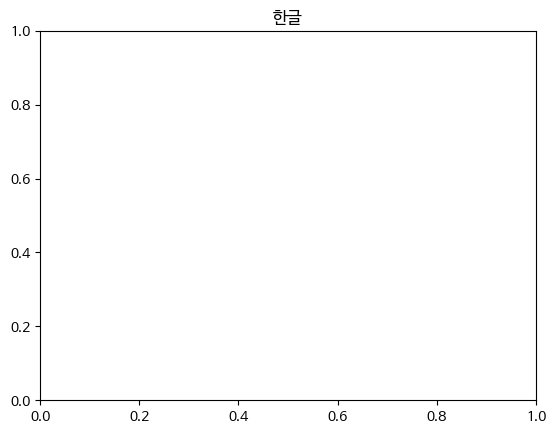

In [ ]:
## 런타임 다시 시작 후 진행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 확인
plt.title('한글')

In [ ]:
# 경고 메시지 무시 라이브러리
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## 데이터 다운로드 - 편집 - DATA방에 저장 - 마운트 후 코딩 시작 (주의 : 마운트 실행 중, 마우스 클릭 등 다른 작업 금지)
# 파일 불러오기
import pandas as pd
dfp = pd.read_excel('/content/drive/MyDrive/SW_데이터마이닝/DATA/data_07_등록금_이상치_dfp.xlsx')
dfp

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학
0,가천대학교,사립,경기,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9
1,가톨릭관동대학교,사립,강원,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0
2,가톨릭대학교,사립,경기,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2
3,강원대학교,국립,강원,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5
4,강원대학교 _제2캠퍼스,국립,강원,4247955.6,3536144.1,4220486.9,4580083.3,4436000.0
...,...,...,...,...,...,...,...,...
121,협성대학교,사립,경기,7460013.9,6623920.3,8493385.1,8611906.1,8610033.9
122,호남대학교,사립,광주,6580113.5,5955466.4,6769929.5,6846129.6,6899773.5
123,호서대학교,사립,충남,7761283.8,6836381.1,7788244.7,8261719.0,8275959.6
124,호원대학교,사립,전북,6952472.6,5760156.1,7135501.8,7502526.6,6852240.7


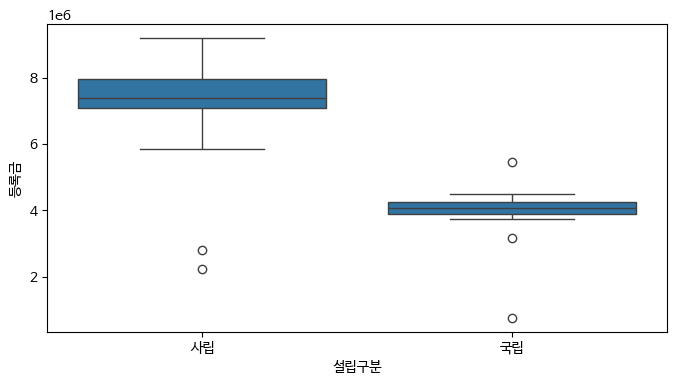

In [ ]:
# 박스플롯
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x='설립구분', y='등록금', data=dfp)
plt.show()

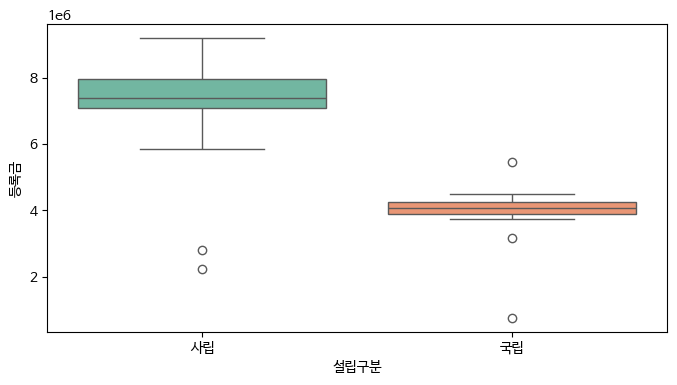

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='설립구분', y='등록금', data=dfp, palette='Set2')  # 적절한 색상 팔레트 선택
plt.show()

In [ ]:
# 사립 조회
dfp[dfp['설립구분'] == '사립']

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학
0,가천대학교,사립,경기,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9
1,가톨릭관동대학교,사립,강원,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0
2,가톨릭대학교,사립,경기,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2
5,건국대학교,사립,서울,8322289.7,6806309.1,8192611.7,9106330.3,9233646.7
6,건국대학교(글로컬) _분교,사립,충북,8077126.5,6787034.0,8114865.1,9054966.9,9027310.8
...,...,...,...,...,...,...,...,...
121,협성대학교,사립,경기,7460013.9,6623920.3,8493385.1,8611906.1,8610033.9
122,호남대학교,사립,광주,6580113.5,5955466.4,6769929.5,6846129.6,6899773.5
123,호서대학교,사립,충남,7761283.8,6836381.1,7788244.7,8261719.0,8275959.6
124,호원대학교,사립,전북,6952472.6,5760156.1,7135501.8,7502526.6,6852240.7


백분위수 quantile(q) 계산


In [ ]:
# 사립 설정 후, 백분위수 계산, 이상치 확인
dfp1 = dfp[dfp['설립구분'] == '사립']

# Q1(25%), Q3(75%)
Q1 = dfp1['등록금'].quantile(q=0.25)
Q3 = dfp1['등록금'].quantile(q=0.75)
IQR = Q3 - Q1

maxBase = Q3 + 1.5 * IQR
minBase = Q1 - 1.5 * IQR

dfp1[(dfp1['등록금'] < minBase) | (dfp1['등록금'] > maxBase)] #or 조건은 ()로 묶임

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학
62,서울디지털대학교,사립,서울,2222454.4,2218818.7,2251044.8,2224193.7,2230958.2
69,세종사이버대학교,사립,서울,2802355.6,2799483.3,2822335.4,2799098.7,2816342.9


In [ ]:
dfp1.describe()

,등록금,인문사회,자연과학,예체능,공학
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,7.405516e+06,6.423159e+06,7.681311e+06,8.014146e+06,8.105076e+06
std,9.290037e+05,8.033585e+05,9.826094e+05,1.123847e+06,1.060020e+06
min,2.222454e+06,2.218819e+06,2.251045e+06,2.224194e+06,2.230958e+06
25%,7.081808e+06,5.960840e+06,7.299670e+06,7.482007e+06,7.726912e+06
50%,7.379493e+06,6.478003e+06,7.767243e+06,8.126308e+06,8.181693e+06
75%,7.961429e+06,6.896856e+06,8.248837e+06,8.690561e+06,8.621985e+06
max,9.203802e+06,8.496061e+06,9.274490e+06,9.979389e+06,9.806990e+06


In [ ]:
dfp1[(dfp1['등록금'] < minBase) | (dfp1['등록금'] > maxBase)].index #해당학교 index 확인

Index([62, 69], dtype='int64')

In [ ]:
list(dfp1[(dfp1['등록금'] < minBase) | (dfp1['등록금'] > maxBase)].index) #해당학교 index 확인, 리스트로 반환

[62, 69]

In [ ]:
# 함수로 만들기 : 전체 Tab 들여쓰기 후 - def 정의 - 매개변수 변경 - return
def out(gubun) :
  dfp1 = dfp[dfp['설립구분'] == gubun] #사립을 gubun 으로 변

  # Q1(25%), Q3(75%)
  Q1 = dfp1['등록금'].quantile(q=0.25)
  Q3 = dfp1['등록금'].quantile(q=0.75)
  IQR = Q3 - Q1

  maxBase = Q3 + 1.5 * IQR
  minBase = Q1 - 1.5 * IQR

  return list(dfp1[(dfp1['등록금'] < minBase) | (dfp1['등록금'] > maxBase)].index)

In [ ]:
# 사립과 국립의 이상치 값을 가지는 행 추출
out('국립')

[61, 112, 113]

In [ ]:
# 리스트 2개 합치기
out('국립') + out('사립')

[61, 112, 113, 62, 69]

In [ ]:
# 리스트 2개 합치고, 변수로 설정 후, 리스트 확인
outlt = out('국립') + out('사립')
dfp.loc[outlt, :]

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학
61,서울과학기술대학교,국립,서울,5465375.3,4740404.0,5497994.2,5583430.0,5555435.6
112,한국교원대학교,국립,충북,3179373.6,2874000.0,3474916.5,3800895.7,3600000.0
113,한국방송통신대학교,국립,서울,760969.1,729175.8,731600.0,757600.0,2214000.0
62,서울디지털대학교,사립,서울,2222454.4,2218818.7,2251044.8,2224193.7,2230958.2
69,세종사이버대학교,사립,서울,2802355.6,2799483.3,2822335.4,2799098.7,2816342.9


In [ ]:
# 이상치 값 제거
dfp.drop(outlt, inplace=True)

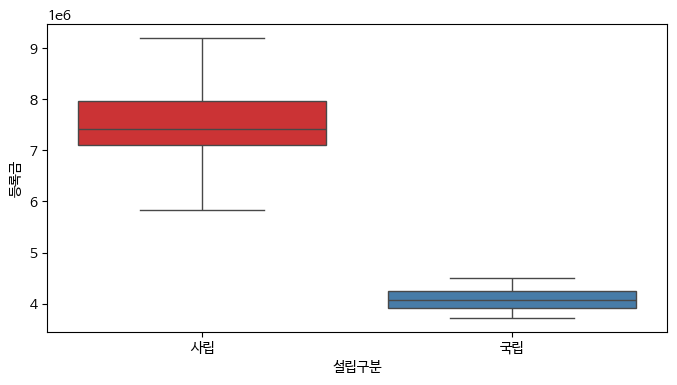

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='설립구분', y='등록금', data=dfp, palette='Set1')
plt.show()

데이터 변환


In [ ]:
# 순서적 인코딩
# scikit-learn 라이브러리 LabelEncoder
from sklearn.preprocessing import LabelEncoder

# OrdinalEncoder 객체 생성
encoder = LabelEncoder()

# 범주형 변수 변환
encoder_data = encoder.fit_transform(dfp['설립구분'])
encoder_data

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# 카테코리 리스트 확인 : 0,1 순
encoder.classes_

array(['국립', '사립'], dtype=object)

In [ ]:
# 카테코리 리스트 확인 : 0,1 순, 조회
dfp['설립구분']

0      사립
1      사립
2      사립
3      국립
4      국립
       ..
121    사립
122    사립
123    사립
124    사립
125    사립
Name: 설립구분, Length: 121, dtype: object

In [ ]:
# 역변환을 통해 원래 범주형 값으로 변환 : 머신러닝에서 target 데이터 확인 시 사용
decoder_data = encoder.inverse_transform(encoder_data)
decoder_data

array(['사립', '사립', '사립', '국립', '국립', '사립', '사립', '사립', '사립', '사립', '사립',
       '국립', '국립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '국립', '국립', '국립', '국립', '국립', '국립', '국립', '국립', '국립', '국립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '국립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '국립', '국립', '사립', '사립', '국립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '국립', '국립', '사립', '사립', '국립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립'],
      dtype=object)

In [ ]:
# 원핫 인코딩
# scikit-learn 라이브러리 OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse=False)

# 데이터를 원핫 인코딩
encoder_data = encoder.fit_transform(dfp[['설립구분']]) #주의 : list화, 국립0 사립1
encoder_data

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
# 카테고리 리스트 확인
encoder.categories_

[array(['국립', '사립'], dtype=object)]

In [ ]:
# 역변환을 통해 원래 범주형 값으로 변환
decoder_data = encoder.inverse_transform(encoder_data)
decoder_data

array([['사립'],
       ['사립'],
       ['사립'],
       ['국립'],
       ['국립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['국립'],
       ['국립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['국립'],
       ['국립'],
       ['국립'],
       ['국립'],
       ['국립'],
       ['국립'],
       ['국립'],
       ['국립'],
       ['국립'],
       ['국립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['국립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사립'],
       ['사

In [ ]:
# 원핫 인코딩된 데이터를 데이터프레임으로 변환
onehot_df = pd.DataFrame(encoder_data)
onehot_df

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
116,0.0,1.0
117,0.0,1.0
118,0.0,1.0
119,0.0,1.0


In [ ]:
# 원핫 인코딩 범주값 확인 : list
encoder.categories_

[array(['국립', '사립'], dtype=object)]

In [ ]:
# 원핫 인코딩 범주값 확인 : list[0]을 numpy array
# 열명으로 사용하기 위해 리스트로 변환
encoder.categories_ [0].tolist()

['국립', '사립']

In [ ]:
# 원핫 인코딩된 데이터를 데이터프레임으로 변환 : 머신러닝에서 feature 값으로 활용하기 위함
onehot_df = pd.DataFrame(encoder_data, columns=encoder.categories_ [0].tolist())
onehot_df

,국립,사립
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
116,0.0,1.0
117,0.0,1.0
118,0.0,1.0
119,0.0,1.0


In [ ]:
# 확인
onehot_df.columns

Index(['국립', '사립'], dtype='object')

In [ ]:
# raw데이터와 원핫 인코딩 데이터 합치기전, 인덱스 정리 : dfp 인덱스 정리된 상태, 원핫데이터는 정리
dfp

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학
0,가천대학교,사립,경기,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9
1,가톨릭관동대학교,사립,강원,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0
2,가톨릭대학교,사립,경기,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2
3,강원대학교,국립,강원,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5
4,강원대학교 _제2캠퍼스,국립,강원,4247955.6,3536144.1,4220486.9,4580083.3,4436000.0
...,...,...,...,...,...,...,...,...
121,협성대학교,사립,경기,7460013.9,6623920.3,8493385.1,8611906.1,8610033.9
122,호남대학교,사립,광주,6580113.5,5955466.4,6769929.5,6846129.6,6899773.5
123,호서대학교,사립,충남,7761283.8,6836381.1,7788244.7,8261719.0,8275959.6
124,호원대학교,사립,전북,6952472.6,5760156.1,7135501.8,7502526.6,6852240.7


In [ ]:
# raw데이터와 원핫 인코딩 데이터 합치기전, 인덱스 정리 : dfp 인덱스 정리된 상태, 원핫데이터는 정리
dfp.reset_index(inplace=True, drop=True) # drop하지않으면, 열로 들어감
dfp

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학
0,가천대학교,사립,경기,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9
1,가톨릭관동대학교,사립,강원,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0
2,가톨릭대학교,사립,경기,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2
3,강원대학교,국립,강원,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5
4,강원대학교 _제2캠퍼스,국립,강원,4247955.6,3536144.1,4220486.9,4580083.3,4436000.0
...,...,...,...,...,...,...,...,...
116,협성대학교,사립,경기,7460013.9,6623920.3,8493385.1,8611906.1,8610033.9
117,호남대학교,사립,광주,6580113.5,5955466.4,6769929.5,6846129.6,6899773.5
118,호서대학교,사립,충남,7761283.8,6836381.1,7788244.7,8261719.0,8275959.6
119,호원대학교,사립,전북,6952472.6,5760156.1,7135501.8,7502526.6,6852240.7


In [ ]:
# 데이터 합치기
dfp = pd.concat([dfp, onehot_df], axis=1) #옆으로 합치기위해 axis=1 사용
dfp

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학,국립,사립
0,가천대학교,사립,경기,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9,0.0,1.0
1,가톨릭관동대학교,사립,강원,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0,0.0,1.0
2,가톨릭대학교,사립,경기,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2,0.0,1.0
3,강원대학교,국립,강원,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5,1.0,0.0
4,강원대학교 _제2캠퍼스,국립,강원,4247955.6,3536144.1,4220486.9,4580083.3,4436000.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
116,협성대학교,사립,경기,7460013.9,6623920.3,8493385.1,8611906.1,8610033.9,0.0,1.0
117,호남대학교,사립,광주,6580113.5,5955466.4,6769929.5,6846129.6,6899773.5,0.0,1.0
118,호서대학교,사립,충남,7761283.8,6836381.1,7788244.7,8261719.0,8275959.6,0.0,1.0
119,호원대학교,사립,전북,6952472.6,5760156.1,7135501.8,7502526.6,6852240.7,0.0,1.0


In [ ]:
dfp.columns

Index(['학교', '설립구분', '지역', '등록금', '인문사회', '자연과학', '예체능', '공학', '국립', '사립'], dtype='object')

과제

지역열 원핫인코딩 실행

In [ ]:
# 원핫 인코딩(지역)

# OneHotEncoder 객체 생성
encoder_Area = OneHotEncoder(sparse=False)

# 데이터를 원핫 인코딩
encoder_Area_data = encoder_Area.fit_transform(dfp[['지역']])

# 원핫 인코딩된 데이터를 데이터프레임으로 변환
onehot_df_Area = pd.DataFrame(encoder_Area_data, columns=encoder_Area.categories_ [0].tolist())

# 데이터 합치기
dfp = pd.concat([dfp, onehot_df_Area], axis=1)
dfp

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학,국립,사립,...,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,가천대학교,사립,경기,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,가톨릭관동대학교,사립,강원,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,가톨릭대학교,사립,경기,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,강원대학교,국립,강원,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,강원대학교 _제2캠퍼스,국립,강원,4247955.6,3536144.1,4220486.9,4580083.3,4436000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,협성대학교,사립,경기,7460013.9,6623920.3,8493385.1,8611906.1,8610033.9,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,호남대학교,사립,광주,6580113.5,5955466.4,6769929.5,6846129.6,6899773.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,호서대학교,사립,충남,7761283.8,6836381.1,7788244.7,8261719.0,8275959.6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119,호원대학교,사립,전북,6952472.6,5760156.1,7135501.8,7502526.6,6852240.7,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


데이터 Scaling


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교      121 non-null    object 
 1   설립구분    121 non-null    object 
 2   지역      121 non-null    object 
 3   등록금     121 non-null    float64
 4   인문사회    121 non-null    float64
 5   자연과학    121 non-null    float64
 6   예체능     121 non-null    float64
 7   공학      121 non-null    float64
 8   국립      121 non-null    float64
 9   사립      121 non-null    float64
 10  강원      121 non-null    float64
 11  경기      121 non-null    float64
 12  경남      121 non-null    float64
 13  경북      121 non-null    float64
 14  광주      121 non-null    float64
 15  대구      121 non-null    float64
 16  대전      121 non-null    float64
 17  부산      121 non-null    float64
 18  서울      121 non-null    float64
 19  세종      121 non-null    float64
 20  울산      121 non-null    float64
 21  인천      121 non-null    float64
 22  전남

In [ ]:
dfp.columns

Index(['학교', '설립구분', '지역', '등록금', '인문사회', '자연과학', '예체능', '공학', '국립', '사립',
       '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object')

In [ ]:
# 표준화
# 1. 필요 라이브러리 가져오기
from sklearn.preprocessing import StandardScaler

# 2. 표준화할 열을 선택
select_col = ['등록금', '인문사회', '자연과학', '예체능', '공학']
data_to_scale = dfp[select_col]
data_to_scale

,등록금,인문사회,자연과학,예체능,공학
0,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9
1,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0
2,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2
3,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5
4,4247955.6,3536144.1,4220486.9,4580083.3,4436000.0
...,...,...,...,...,...
116,7460013.9,6623920.3,8493385.1,8611906.1,8610033.9
117,6580113.5,5955466.4,6769929.5,6846129.6,6899773.5
118,7761283.8,6836381.1,7788244.7,8261719.0,8275959.6
119,6952472.6,5760156.1,7135501.8,7502526.6,6852240.7


In [ ]:
# 3. StandardScaler 객체를 생성하고 데이터를 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_data

array([[ 1.00510478e+00,  9.14794513e-01,  7.85142084e-01,
         1.09456054e+00,  9.89744156e-01],
       [ 1.94288563e-01,  3.70856491e-01,  2.32023407e-01,
         4.62882550e-01,  3.61226399e-01],
       [ 1.13505704e-01,  1.56321988e-01,  2.27591721e-01,
         7.07884875e-01,  4.90620678e-01],
       [-1.99032520e+00, -1.95614898e+00, -1.91267287e+00,
        -1.82704052e+00, -1.97111543e+00],
       [-1.88755893e+00, -1.88471320e+00, -1.96773400e+00,
        -1.82232214e+00, -1.96239367e+00],
       [ 9.99609684e-01,  6.54162563e-01,  6.92446545e-01,
         1.02233232e+00,  1.05871965e+00],
       [ 8.25881296e-01,  6.39197849e-01,  6.40378696e-01,
         9.90051468e-01,  9.28788422e-01],
       [-3.49774650e-01, -7.55951727e-02, -1.63282649e-03,
        -4.82769962e-01, -1.77673676e-01],
       [ 3.24283830e-01,  3.99811103e-01,  4.15994628e-01,
         3.34173234e-01,  5.12196781e-01],
       [-2.66433945e-01, -1.96153700e-01, -4.17920790e-01,
         2.96686995e-03

In [ ]:
# 4. 표준화된 데이터를 처리하기 위해서 데이터 프레임 복사
dfs = dfp.copy()
dfs

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학,국립,사립,...,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,가천대학교,사립,경기,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,가톨릭관동대학교,사립,강원,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,가톨릭대학교,사립,경기,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,강원대학교,국립,강원,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,강원대학교 _제2캠퍼스,국립,강원,4247955.6,3536144.1,4220486.9,4580083.3,4436000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,협성대학교,사립,경기,7460013.9,6623920.3,8493385.1,8611906.1,8610033.9,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,호남대학교,사립,광주,6580113.5,5955466.4,6769929.5,6846129.6,6899773.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,호서대학교,사립,충남,7761283.8,6836381.1,7788244.7,8261719.0,8275959.6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119,호원대학교,사립,전북,6952472.6,5760156.1,7135501.8,7502526.6,6852240.7,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# 5. 표준화된 데이터를 새로운 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=select_col)

# 6. 표준화된 데이터프레임으로 열을 교체 : 평균 확인(0근사)
scaled_df.mean()

등록금     1.123069e-15
인문사회   -1.211152e-16
자연과학    7.432071e-17
예체능    -3.303143e-16
공학     -2.330551e-16
dtype: float64

In [ ]:
# 6. 표준화된 데이터프레임으로 열을 교체 : 표준편차 확인(1근사)
scaled_df.std()

등록금     1.004158
인문사회    1.004158
자연과학    1.004158
예체능     1.004158
공학      1.004158
dtype: float64

In [ ]:
# 6. 표준화된 데이터프레임으로 열을 교체, 확인
dfs[select_col] = scaled_df
dfs

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학,국립,사립,...,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,가천대학교,사립,경기,1.005105,0.914795,0.785142,1.094561,0.989744,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,가톨릭관동대학교,사립,강원,0.194289,0.370856,0.232023,0.462883,0.361226,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,가톨릭대학교,사립,경기,0.113506,0.156322,0.227592,0.707885,0.490621,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,강원대학교,국립,강원,-1.990325,-1.956149,-1.912673,-1.827041,-1.971115,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,강원대학교 _제2캠퍼스,국립,강원,-1.887559,-1.884713,-1.967734,-1.822322,-1.962394,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,협성대학교,사립,경기,0.388581,0.512560,0.893878,0.711597,0.666026,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,호남대학교,사립,광주,-0.234937,-0.006411,-0.260341,-0.398158,-0.410937,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,호서대학교,사립,충남,0.602068,0.677510,0.421637,0.491511,0.455657,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119,호원대학교,사립,전북,0.028925,-0.158045,-0.015513,0.014374,-0.440869,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


정규화


In [ ]:
# 1. 필요한 라이브러리 가져오기
from sklearn.preprocessing import MinMaxScaler

# 2. 표준화할 열 선택
data_to_scale = dfp[select_col]

# 3. Min-Max 스케일러 객체 생성
scaler = MinMaxScaler()

# 4. Min-Max Scaling 적용
scaled_data = scaler.fit_transform(data_to_scale)

# 5. 데이터 프레임 복사 : 표준화된 데이터를 처리하기 위함
dfmm = dfp.copy()

# 6. 표준화된 데이터를 새로운 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=select_col)

# 7. 표준화된 데아터프레임으로 열을 교체
dfmm[select_col] = scaled_df

# 데이터 확인
dfmm

,학교,설립구분,지역,등록금,인문사회,자연과학,예체능,공학,국립,사립,...,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,가천대학교,사립,경기,0.840561,0.744657,0.827142,0.873336,0.886092,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,가톨릭관동대학교,사립,강원,0.631770,0.612537,0.675822,0.705412,0.719601,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,가톨릭대학교,사립,경기,0.610968,0.560428,0.674610,0.770543,0.753877,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,강원대학교,국립,강원,0.069217,0.047320,0.089088,0.096665,0.101778,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,강원대학교 _제2캠퍼스,국립,강원,0.095680,0.064672,0.074025,0.097919,0.104089,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,협성대학교,사립,경기,0.681802,0.646957,0.856889,0.771530,0.800341,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,호남대학교,사립,광주,0.521241,0.520901,0.541124,0.476515,0.515060,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,호서대학교,사립,충남,0.736776,0.687022,0.727696,0.713023,0.744616,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119,호원대학교,사립,전북,0.589188,0.484070,0.608103,0.586182,0.507131,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# 그래프 그리기
import plotly.express as px
fig = px.histogram(dfmm, x='등록금')
fig.show()

In [ ]:
# 그래프 그리기
fig = px.histogram(dfmm, x='등록금', facet_col='설립구분')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

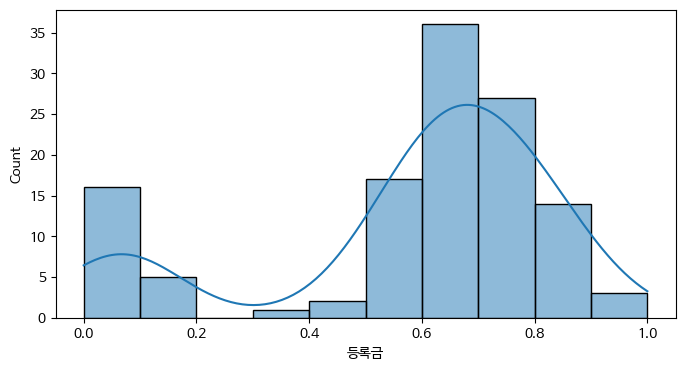

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(x='등록금', bins=10, kde=True, data=dfmm)
plt.show

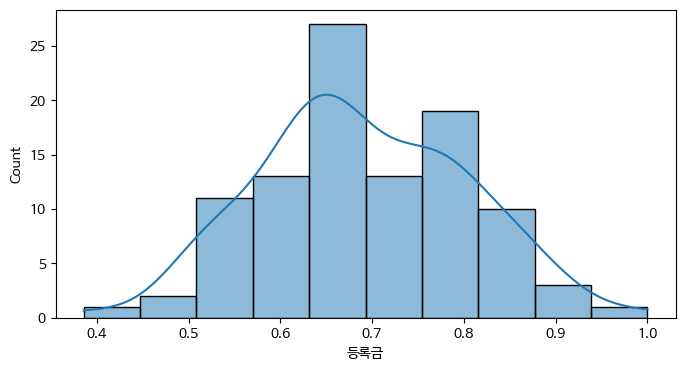

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(x='등록금', bins=10, kde=True, data=dfmm[dfmm['설립구분'] == '사립'])
plt.show()

In [ ]:
dfmm.to_csv('/content/drive/MyDrive/SW_데이터마이닝/DATA/data_07_등록금_정규화_dfmm.csv', encoding='utf-8-sig', index=False)

In [ ]:
dfp.to_csv('/content/drive/MyDrive/SW_데이터마이닝/DATA/data_08_등록금_.csv', encoding='utf-8-sig', index=False)